Create test and train dataframes

In [2]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Apply label encoder for categorical values

In [6]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

columns_to_encode = ["Sex", "Embarked", "Cabin"]

for column in columns_to_encode:
    train_df[column] = label_encoder.fit_transform(train_df[column].values)
    test_df[column] = label_encoder.fit_transform(test_df[column].values)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB


Remove remaining categorial columns

In [8]:
categorial_cols = train_df.select_dtypes(include=["object"]).columns

train_df = train_df.drop(columns=categorial_cols)
test_df = test_df.drop(columns=categorial_cols)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,147,2
1,2,1,1,0,38.0,1,0,71.2833,81,0
2,3,1,3,0,26.0,0,0,7.9250,147,2
3,4,1,1,0,35.0,1,0,53.1000,55,2
4,5,0,3,1,35.0,0,0,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,147,2
887,888,1,1,0,19.0,0,0,30.0000,30,2
888,889,0,3,0,NaN,1,2,23.4500,147,2
889,890,1,1,1,26.0,0,0,30.0000,60,0


Remove nullable rows

In [10]:
train_df[train_df.isnull().any(axis=1)]

train_df = train_df.fillna(-1)
test_df = test_df.fillna(-1)

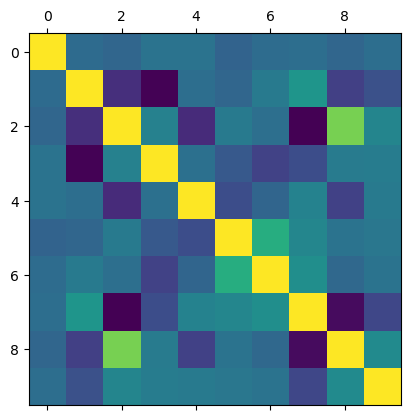

In [13]:
import matplotlib.pyplot as plt

plt.matshow(train_df.corr())

Train data frame using KNN classifier

In [18]:
X_train = train_df.drop(columns=["Survived"])
y_train = train_df["Survived"]

from sklearn.svm import SVC

svc = SVC(C=1.0)

svc.fit(X_train, y_train)

y_predict_result = svc.predict(test_df)

Export results to CSV

In [19]:
result_df = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": y_predict_result })

print(result_df)

result_df.to_csv("result.csv", index=False)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         0
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
